# Test del SIDA


## El enunciado

En cierta población existe una enfermedad grave con una incidencia **muy baja** y un proceso de incubación muy lento.  

Se ha desarrollado un *test* para detectarla precozmente pero el *test* no es perfecto. Concretamente tiene una **sensibilidad** del $95 \%$ y una **especificidad** del $90\%$.  

El problema es el siguiente:  

  - Se escoge un individuo al azar de la población.  

  - Se le hace el *test* y da **positivo** para la enfermedad.  

  - ¿Cuál es la probabilidad de que tenga realmente la enfermedad?  
  

## La solución

La solución nos la da el teorema de **Bayes**:
$$
p( S \vert + I ) = p( S \vert I ) \times \frac{p( + \vert S I)}{p( + \vert I)}
$$
donde:  

  1. I es la información general sobre el problema.  

  2. S significa que el individuo tiene el Sida.  

  3. $+$ significa que ha dado positivo en el *test*.  

Por supuesto, $p( S \vert I )$ es la probabilidad de que el individuo elegido tenga el Sida (sin tener ninguna otra información). Podemos asignar a esta probabilidad la incidencia de la enfermedad en dicha población.  

$p( + \vert S I)$ es la **sensibilidad** del *test*: la probabilidad de dar positivo teniendo la enfermedad.  

$p( + \vert I)$ es la probabilidad de dar positivo. De acuerdo con la fórmula de la probabilidad total:
$$
p( + \vert I) = p( S \vert I) \times p( + \vert S I) + p( \overline{S} \vert I) \times p( + \vert \overline{S} I)
$$
donde $\overline{S}$ significa que el individuo no tiene el Sida.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

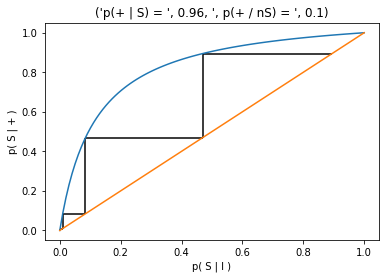

In [29]:
#Sensibilidad = probabilidad de dar positivo teniendo la enfermedad
pPos_Sida = .96

#Especifididad = probabilidad de dar negativo no teniendo la enfermedad
pNeg_NoSida = .9

#por tanto, la probabilidad de falsos positivos será
pPos_NoSida = 1 - pNeg_NoSida

titulo = "p(+ | S) = ", pPos_Sida, ", p(+ / nS) = ",np.round(pPos_NoSida,3)

#Incidencia de la enfermedad: de muy escasa a generalizada
pSida = np.linspace( 0, 1, 100 )

#lógicamente, la probabilidad de no tener la enfermedad será
pNoSida = 1 - pSida

#Probabilidad de dar positivo
pPos = pSida * pPos_Sida + pNoSida * pPos_NoSida

#Bayes
pSida_Pos = pSida * pPos_Sida / pPos

plt.plot( pSida, pSida_Pos );
plt.plot( [ 0, 1 ], [ 0, 1 ]);

plt.xlabel('p( S | I )');
plt.ylabel('p( S | + )');
plt.title( titulo );

#Supongamos 4 test positivos
prior = 1 / 1000

vero = pPos_Sida

for i in range(4):
  
  #Probabilidad de dar positivo
  pPos = prior * pPos_Sida + ( 1 - prior ) * pPos_NoSida

  #Bayes
  posterior = prior * vero / pPos

  plt.vlines( prior, prior, posterior );
  
  plt.hlines( posterior, prior, posterior );
  
  prior = posterior
  

 